# Non-linear Stability 개요

**강좌**: *기초 전산유체역학*

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np

plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 150

## 수치 진동
### Odd-Even Decoupling
- Linear wave 방정식에서 다음과 같은 Odd-Even 진동을 해석해보자.

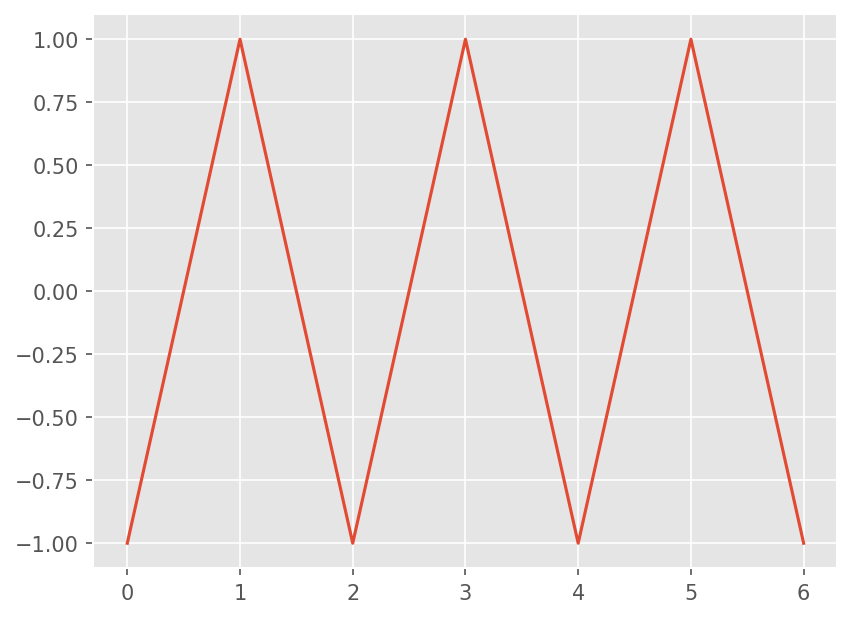

In [14]:
x = np.linspace(0, 6, 7).astype(int)
y = 2*(x % 2) -1

plt.plot(x, y)

이를 중앙차분법 (Unstable flux)로 계산하면

$$
\frac{\partial u_i}{\partial t} + \frac{a}{2 \Delta x} (u_{i+1} - u_{i-1}) = 0.
$$

이 진동은 계속 유지된다.

## Gibbs oscillations
- 불연속 구간을 매우 높은 정확도로 근사할 경우 수치 진동이 발생한다.

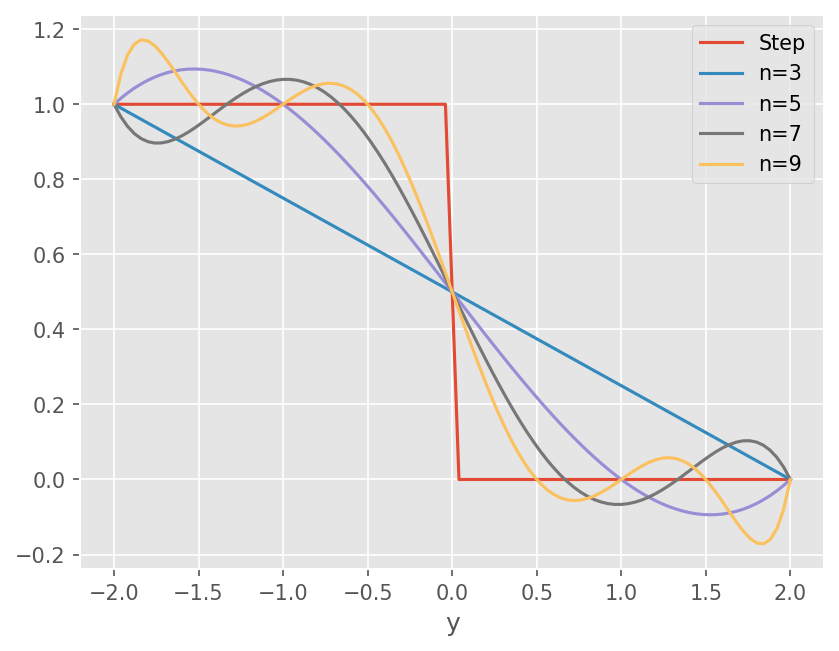

In [16]:
x = np.linspace(-2, 2, 101)
stepf = lambda x: (1-np.tanh(1e8*x))/2

fs = []
for n in [3, 5, 7, 9]:
    xdata = np.linspace(-2, 2, n)
    fdata = stepf(xdata)

    f = 0
    for xi, fi in zip(xdata, fdata):
        # Compute Li
        Li = 1
        for xj in xdata:
            if xi != xj:
                Li *= (x- xj)/(xi - xj)

        f += Li*fi

    fs.append(f)
    

plt.plot(x, stepf(x))

for fi in fs:
    plt.plot(x, fi)

plt.xlabel('x')
plt.xlabel('y')
plt.legend([
    'Step', 'n=3', 'n=5', 'n=7', 'n=9'
])

## Monotone scheme
- 충격파와 같은 불연속한 해를 안정적으로 해석하기 위해서는 새로운 수치 진동이 발생하지 말아야 한다.

- 수치 진동이 발생하지 않는, 즉 해의 단조성이 보장되는, 기법을 monotone scheme 이라고 한다.

$$
u_j^0 \geq v_j^0 \rightarrow u_j^n \geq v_j^n
$$

### Godunov theorem
- (Godunov, 1959) Linear numerical schemes for solving partial differential equations (PDE's), having the property of not generating new extrema (monotone scheme), can be at most first-order accurate.

### Entropy를 만족하는 해
- (Harten et al., 1976) Montone 기법의 경우 Entropy를 만족하는 해로 수렴한다.

#### 실습 (Transonic rarefaction)
- 아래와 같이 Burgers 방정식에 대해서 천음속 팽창파를 해석해보자.

$$
u_0 (x) = \begin{cases}
            -0.5~x \leq 0.5 \\
            1.5 \text{ else}
        \end{cases}
$$

- $t=0.2$ 일 때 수치 해를 다음 두 기법으로 구하시오.
    - Upwind 기법
    - Local Lax Friedrich 기법
    
        $$
F_{i+1/2}^n = \frac{1}{2} 
\left [
f(U_i^n) + f(U_{i+1}^n)
\right ]
- \frac{1}{2} |a_{i+1/2}| \left (
U_{i+1}^n - U_i^n
\right ), a_{i+1/2} = \max(|f'(U_{i}|, |f'(U_{i+1}|)
        $$

## High Resolution Scheme
- 비선형 제한자를 도입하여 연속적인 구간에서는 2차 이상의 공간 정확도를 갖고, 충격파 부근에서만 1차 공간 정확도를 갖도록 한다.

- 충격파 포착 기법 (Shock-capturing method)

$$
F^{HL} = F^{1st} + \phi (F^{High} - F^{1st})
$$